We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by [American Community Survey](https://www.census.gov/programs-surveys/acs/), which conducts surveys and aggregates the data.

Here are some of the columns in the dataset:

* `Rank` - Rank by median earnings (the dataset is ordered by this column).
* `Major_code` - Major code.
* `Major` - Major description.
* `Major_category` - Category of major.
* `Total` - Total number of people with major.
* `Sample_size` - Sample size (unweighted) of full-time.
* `Men` - Male graduates.
* `Women` - Female graduates.
* `ShareWomen` - Women as share of total.
* `Employed` - Number employed.
* `Median` - Median salary of full-time, year-round workers.
* `Low_wage_jobs` - Number in low-wage service jobs.
* `Full_time` - Number employed 35 hours or more.
* `Part_time` - Number employed less than 35 hours.

Our aim is to identify;

* Dominant Major_category for Men and Women
* Top Majors in Dominant category according to the highest Employment
* Top Majors in Dominant category according to highest Median Salary

In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [6]:
jobs = pd.read_csv("jobs.csv")

In [7]:
jobs.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [8]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  173 non-null    int64  
 1   Major_code            173 non-null    int64  
 2   Major                 173 non-null    object 
 3   Total                 172 non-null    float64
 4   Men                   172 non-null    float64
 5   Women                 172 non-null    float64
 6   Major_category        173 non-null    object 
 7   ShareWomen            172 non-null    float64
 8   Sample_size           173 non-null    int64  
 9   Employed              173 non-null    int64  
 10  Full_time             173 non-null    int64  
 11  Part_time             173 non-null    int64  
 12  Full_time_year_round  173 non-null    int64  
 13  Unemployed            173 non-null    int64  
 14  Unemployment_rate     173 non-null    float64
 15  Median                1

In [9]:
jobs.isnull().sum()

Rank                    0
Major_code              0
Major                   0
Total                   1
Men                     1
Women                   1
Major_category          0
ShareWomen              1
Sample_size             0
Employed                0
Full_time               0
Part_time               0
Full_time_year_round    0
Unemployed              0
Unemployment_rate       0
Median                  0
P25th                   0
P75th                   0
College_jobs            0
Non_college_jobs        0
Low_wage_jobs           0
dtype: int64

In [10]:
import seaborn as sns 

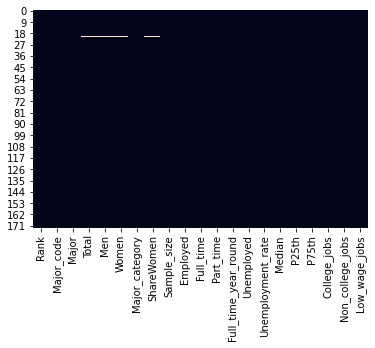

In [11]:
sns.heatmap(jobs.isnull(), cbar = False )
plt.show()

In [12]:
jobs[jobs["Men"].isnull()]

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
21,22,1104,FOOD SCIENCE,NaN,NaN,NaN,Agriculture & Natural Resources,NaN,36,3149,...,1121,1735,338,0.096931,53000,32000,70000,1183,1274,485


In [13]:
jobs.dropna(axis = "index", inplace = True)

In [14]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 0 to 172
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  172 non-null    int64  
 1   Major_code            172 non-null    int64  
 2   Major                 172 non-null    object 
 3   Total                 172 non-null    float64
 4   Men                   172 non-null    float64
 5   Women                 172 non-null    float64
 6   Major_category        172 non-null    object 
 7   ShareWomen            172 non-null    float64
 8   Sample_size           172 non-null    int64  
 9   Employed              172 non-null    int64  
 10  Full_time             172 non-null    int64  
 11  Part_time             172 non-null    int64  
 12  Full_time_year_round  172 non-null    int64  
 13  Unemployed            172 non-null    int64  
 14  Unemployment_rate     172 non-null    float64
 15  Median                1

In [15]:
jobs.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [16]:
len(jobs["Major_category"].unique())

16

In [17]:
dominancy = jobs.groupby("Major_category")[["Men","Women"]].mean()

In [18]:
dominancy 

,Men,Women
Major_category,,
Agriculture & Natural Resources,4484.111111,3918.111111
Arts,16798.750000,27842.500000
Biology & Life Science,13208.500000,19210.214286
Business,51373.230769,48809.538462
Communications & Journalism,32980.250000,65170.000000
Computers & Mathematics,18975.000000,8207.545455
Education,6470.375000,28475.187500
Engineering,14079.551724,4457.793103
Health,6293.083333,32309.416667


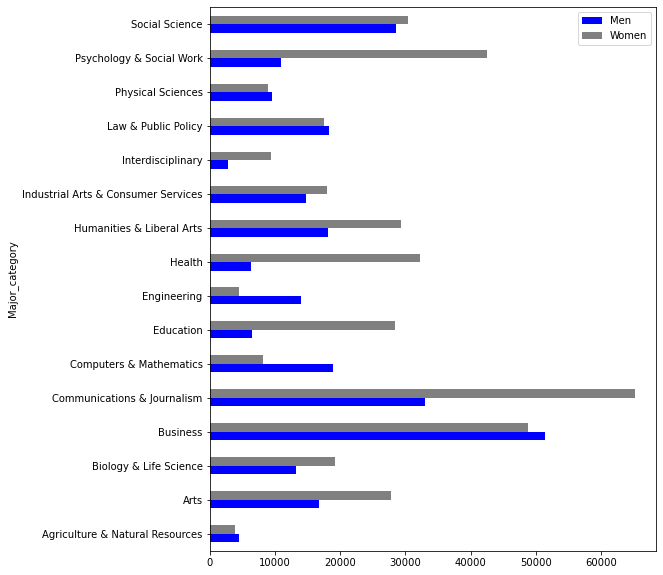

In [19]:
dominancy.plot.barh(figsize = (8,10),
                   color = {"Men":"blue","Women":"gray"})
plt.show()

In [20]:
dominancy.iloc[0]["Women"]

3918.1111111111113

In [21]:
def dom(row):
    men = row["Men"]
    women = row["Women"]
    if men > women:
        return "Men"
    else:
        return "women"

In [22]:
dominancy.apply(dom, axis = 1)

Major_category
Agriculture & Natural Resources          Men
Arts                                   women
Biology & Life Science                 women
Business                                 Men
Communications & Journalism            women
Computers & Mathematics                  Men
Education                              women
Engineering                              Men
Health                                 women
Humanities & Liberal Arts              women
Industrial Arts & Consumer Services    women
Interdisciplinary                      women
Law & Public Policy                      Men
Physical Sciences                        Men
Psychology & Social Work               women
Social Science                         women
dtype: object

In [23]:
dominancy["Dom_Gen"] = dominancy.apply(dom, axis = 1)
dominancy

,Men,Women,Dom_Gen
Major_category,,,
Agriculture & Natural Resources,4484.111111,3918.111111,Men
Arts,16798.750000,27842.500000,women
Biology & Life Science,13208.500000,19210.214286,women
Business,51373.230769,48809.538462,Men
Communications & Journalism,32980.250000,65170.000000,women
Computers & Mathematics,18975.000000,8207.545455,Men
Education,6470.375000,28475.187500,women
Engineering,14079.551724,4457.793103,Men
Health,6293.083333,32309.416667,women


In [24]:
gen_group = dominancy.groupby("Dom_Gen")

In [25]:
gen_group.groups

{'Men': ['Agriculture & Natural Resources', 'Business', 'Computers & Mathematics', 'Engineering', 'Law & Public Policy', 'Physical Sciences'], 'women': ['Arts', 'Biology & Life Science', 'Communications & Journalism', 'Education', 'Health', 'Humanities & Liberal Arts', 'Industrial Arts & Consumer Services', 'Interdisciplinary', 'Psychology & Social Work', 'Social Science']}

In [26]:
men_df = gen_group.get_group("Men")
men_df


,Men,Women,Dom_Gen
Major_category,,,
Agriculture & Natural Resources,4484.111111,3918.111111,Men
Business,51373.230769,48809.538462,Men
Computers & Mathematics,18975.000000,8207.545455,Men
Engineering,14079.551724,4457.793103,Men
Law & Public Policy,18225.800000,17595.600000,Men
Physical Sciences,9539.000000,9008.900000,Men


In [27]:
women_df = gen_group.get_group("women")
women_df


,Men,Women,Dom_Gen
Major_category,,,
Arts,16798.750000,27842.500000,women
Biology & Life Science,13208.500000,19210.214286,women
Communications & Journalism,32980.250000,65170.000000,women
Education,6470.375000,28475.187500,women
Health,6293.083333,32309.416667,women
Humanities & Liberal Arts,18189.733333,29374.800000,women
Industrial Arts & Consumer Services,14825.857143,18001.571429,women
Interdisciplinary,2817.000000,9479.000000,women
Psychology & Social Work,10901.666667,42543.555556,women


In [28]:
men_cat = sorted(men_df.index)
men_cat = list(men_cat)
men_cat

['Agriculture & Natural Resources',
 'Business',
 'Computers & Mathematics',
 'Engineering',
 'Law & Public Policy',
 'Physical Sciences']

In [29]:
women_cat = list(women_df.index)
women_cat

['Arts',
 'Biology & Life Science',
 'Communications & Journalism',
 'Education',
 'Health',
 'Humanities & Liberal Arts',
 'Industrial Arts & Consumer Services',
 'Interdisciplinary',
 'Psychology & Social Work',
 'Social Science']

# Conclusion 
### Men_category_dominancy                                                 
* 'Agriculture & Natural Resources',                              
* 'Business',
* 'Computers & Mathematics',
* 'Engineering',
* Law & Public Policy',
* 'Physical Sciences'

### Women_category_dominancy
* 'Arts',
* 'Biology & Life Science',
* 'Communications & Journalism',
* 'Education',
* 'Health',
* 'Humanities & Liberal Arts',
* 'Industrial Arts & Consumer Services',
* 'Interdisciplinary',
* 'Psychology & Social Work',
* 'Social Science'


In [30]:
jobs.head(1)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193


In [31]:
men_bol = jobs["Major_category"].isin(men_cat)
men_bol

0       True
1       True
2       True
3       True
4       True
       ...  
168    False
169    False
170    False
171    False
172    False
Name: Major_category, Length: 172, dtype: bool

In [32]:
women_bol = jobs["Major_category"].isin(women_cat)
women_bol

0      False
1      False
2      False
3      False
4      False
       ...  
168     True
169     True
170     True
171     True
172     True
Name: Major_category, Length: 172, dtype: bool

In [33]:
men_majors = jobs[men_bol]
men_majors.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [34]:
women_majors = jobs[women_bol]
women_majors.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
26,27,5601,CONSTRUCTION SERVICES,18498.0,16820.0,1678.0,Industrial Arts & Consumer Services,0.090713,295,16318,...,1751,12313,1042,0.060023,50000,36000,60000,3275,5351,703
32,33,6099,MISCELLANEOUS FINE ARTS,3340.0,1970.0,1370.0,Arts,0.410180,30,2914,...,1067,1200,286,0.089375,50000,25000,66000,693,1714,755
34,35,6107,NURSING,209394.0,21773.0,187621.0,Health,0.896019,2554,180903,...,40818,122817,8497,0.044863,48000,39000,58000,151643,26146,6193
36,37,5501,ECONOMICS,139247.0,89749.0,49498.0,Social Science,0.355469,1322,104117,...,25325,70740,11452,0.099092,47000,35000,65000,25582,37057,10653
44,45,6105,MEDICAL TECHNOLOGIES TECHNICIANS,15914.0,3916.0,11998.0,Health,0.753927,190,13150,...,2665,9005,505,0.036983,45000,36000,50000,5546,7176,1002


In [35]:
men_majors.shape

(77, 21)

In [36]:
women_majors.shape

(95, 21)

In [37]:
sorted(men_majors["Major_category"].unique())

['Agriculture & Natural Resources',
 'Business',
 'Computers & Mathematics',
 'Engineering',
 'Law & Public Policy',
 'Physical Sciences']

In [38]:
c = sorted(men_majors["Major_category"].unique())              # prove karna hai
#pd.Series(sorted(c).equals(pd.Series(men_cat))
pd.Series(sorted(c)).equals(sorted(men_cat))             # issue hai yahan par TRrue aana chaiye 

False

## TASK # 02 
### Top Majors in Dominant category according to the highest Employment and Median for Men 

In [39]:
emp_men_maj = men_majors.sort_values(["Employed"],
                                    ascending = False)

In [40]:
emp_men_maj 

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
76,77,6203,BUSINESS MANAGEMENT AND ADMINISTRATION,329927.0,173809.0,156118.0,Business,0.473190,4212,276234,...,50357,199897,21502,0.072218,38000,29000,50000,36720,148395,32395
57,58,6200,GENERAL BUSINESS,234590.0,132238.0,102352.0,Business,0.436302,2380,190183,...,36241,138299,14946,0.072861,40000,30000,55000,29334,100831,27320
77,78,6206,MARKETING AND MARKETING RESEARCH,205211.0,78857.0,126354.0,Business,0.615727,2684,178862,...,35829,127230,11663,0.061215,38000,30000,50000,25320,93889,27968
40,41,6201,ACCOUNTING,198633.0,94519.0,104114.0,Business,0.524153,2042,165527,...,27693,123169,12411,0.069749,45000,34000,56000,11417,39323,10886
35,36,6207,FINANCE,174506.0,115030.0,59476.0,Business,0.340825,2189,145696,...,21463,108595,9413,0.060686,47000,35000,64000,24243,48447,9910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
112,113,1106,SOIL SCIENCE,685.0,476.0,209.0,Agriculture & Natural Resources,0.305109,4,613,...,185,383,0,0.000000,35000,18500,44000,355,144,0
33,34,2411,GEOLOGICAL AND GEOPHYSICAL ENGINEERING,720.0,488.0,232.0,Engineering,0.322222,5,604,...,126,396,49,0.075038,50000,42800,57000,501,50,49


In [41]:
emp_men_maj.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
76,77,6203,BUSINESS MANAGEMENT AND ADMINISTRATION,329927.0,173809.0,156118.0,Business,0.473190,4212,276234,...,50357,199897,21502,0.072218,38000,29000,50000,36720,148395,32395
57,58,6200,GENERAL BUSINESS,234590.0,132238.0,102352.0,Business,0.436302,2380,190183,...,36241,138299,14946,0.072861,40000,30000,55000,29334,100831,27320
77,78,6206,MARKETING AND MARKETING RESEARCH,205211.0,78857.0,126354.0,Business,0.615727,2684,178862,...,35829,127230,11663,0.061215,38000,30000,50000,25320,93889,27968
40,41,6201,ACCOUNTING,198633.0,94519.0,104114.0,Business,0.524153,2042,165527,...,27693,123169,12411,0.069749,45000,34000,56000,11417,39323,10886
35,36,6207,FINANCE,174506.0,115030.0,59476.0,Business,0.340825,2189,145696,...,21463,108595,9413,0.060686,47000,35000,64000,24243,48447,9910


In [42]:
emp_men_maj.groupby("Major_category")["Employed"].max()

Major_category
Agriculture & Natural Resources     17112
Business                           276234
Computers & Mathematics            102087
Engineering                         76442
Law & Public Policy                125393
Physical Sciences                   48535
Name: Employed, dtype: int64

In [43]:
m_category = emp_men_maj.groupby("Major_category")[["Major",
                                                   "Employed",
                                                   "Median"]].max()

In [44]:
m_category

,Major,Employed,Median
Major_category,,,
Agriculture & Natural Resources,SOIL SCIENCE,17112,40000
Business,OPERATIONS LOGISTICS AND E-COMMERCE,276234,62000
Computers & Mathematics,STATISTICS AND DECISION SCIENCE,102087,53000
Engineering,PETROLEUM ENGINEERING,76442,110000
Law & Public Policy,PUBLIC POLICY,125393,54000
Physical Sciences,PHYSICS,48535,62000


In [45]:
sal_men_maj = men_majors.sort_values(["Median"],
                                    ascending = False)


In [46]:
s_m_category = sal_men_maj.groupby("Major_category")[["Major",
                                                   "Employed",
                                                   "Median"]].first()

In [47]:
s_m_category 

,Major,Employed,Median
Major_category,,,
Agriculture & Natural Resources,GENERAL AGRICULTURE,8884,40000
Business,ACTUARIAL SCIENCE,2912,62000
Computers & Mathematics,COMPUTER SCIENCE,102087,53000
Engineering,PETROLEUM ENGINEERING,1976,110000
Law & Public Policy,COURT REPORTING,930,54000
Physical Sciences,ASTRONOMY AND ASTROPHYSICS,1526,62000


In [48]:
cols = ["Employed","Median"]

normalize_mean = s_m_category.copy()
for c in cols:
    normalize_mean[c] = normalize_mean[c]*100/sum(normalize_mean[c])
    

In [49]:
normalize_mean

,Major,Employed,Median
Major_category,,,
Agriculture & Natural Resources,GENERAL AGRICULTURE,7.508769,10.498688
Business,ACTUARIAL SCIENCE,2.461226,16.272966
Computers & Mathematics,COMPUTER SCIENCE,86.284072,13.910761
Engineering,PETROLEUM ENGINEERING,1.670118,28.871391
Law & Public Policy,COURT REPORTING,0.786037,14.173228
Physical Sciences,ASTRONOMY AND ASTROPHYSICS,1.289777,16.272966


In [50]:
norm_men = normalize_mean.set_index("Major")
norm_men

,Employed,Median
Major,,
GENERAL AGRICULTURE,7.508769,10.498688
ACTUARIAL SCIENCE,2.461226,16.272966
COMPUTER SCIENCE,86.284072,13.910761
PETROLEUM ENGINEERING,1.670118,28.871391
COURT REPORTING,0.786037,14.173228
ASTRONOMY AND ASTROPHYSICS,1.289777,16.272966


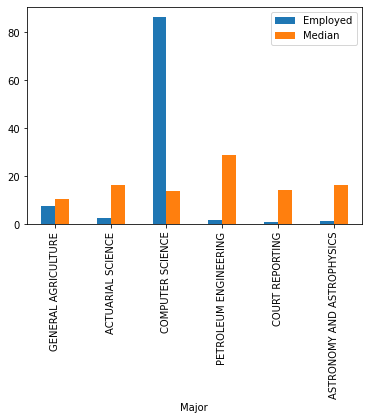

In [51]:
norm_men.plot.bar()
plt.show()

## TASK # 03 
### Top Majors in Dominant category according to the highest Employment and Median for Women 

In [52]:
women_major = jobs[jobs["Major_category"].isin(women_cat)]
women_major

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
26,27,5601,CONSTRUCTION SERVICES,18498.0,16820.0,1678.0,Industrial Arts & Consumer Services,0.090713,295,16318,...,1751,12313,1042,0.060023,50000,36000,60000,3275,5351,703
32,33,6099,MISCELLANEOUS FINE ARTS,3340.0,1970.0,1370.0,Arts,0.410180,30,2914,...,1067,1200,286,0.089375,50000,25000,66000,693,1714,755
34,35,6107,NURSING,209394.0,21773.0,187621.0,Health,0.896019,2554,180903,...,40818,122817,8497,0.044863,48000,39000,58000,151643,26146,6193
36,37,5501,ECONOMICS,139247.0,89749.0,49498.0,Social Science,0.355469,1322,104117,...,25325,70740,11452,0.099092,47000,35000,65000,25582,37057,10653
44,45,6105,MEDICAL TECHNOLOGIES TECHNICIANS,15914.0,3916.0,11998.0,Health,0.753927,190,13150,...,2665,9005,505,0.036983,45000,36000,50000,5546,7176,1002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308


In [53]:
emp_women_maj = women_major.sort_values(["Employed"],
                                    ascending = False)
emp_women_maj

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
145,146,5200,PSYCHOLOGY,393735.0,86648.0,307087.0,Psychology & Social Work,0.779933,2584,307933,...,115172,174438,28169,0.083811,31500,24000,41000,125148,141860,48207
123,124,3600,BIOLOGY,280709.0,111762.0,168947.0,Biology & Life Science,0.601858,1370,182295,...,72371,100336,13874,0.070725,33400,24000,45000,88232,81109,28339
34,35,6107,NURSING,209394.0,21773.0,187621.0,Health,0.896019,2554,180903,...,40818,122817,8497,0.044863,48000,39000,58000,151643,26146,6193
93,94,1901,COMMUNICATIONS,213996.0,70619.0,143377.0,Communications & Journalism,0.669999,2394,179633,...,49889,116251,14602,0.075177,35000,27000,45000,40763,97964,27440
138,139,2304,ELEMENTARY EDUCATION,170862.0,13029.0,157833.0,Education,0.923745,1629,149339,...,37965,86540,7297,0.046586,32000,23400,38000,108085,36972,11502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,84,3602,BOTANY,1329.0,626.0,703.0,Biology & Life Science,0.528969,9,1010,...,169,740,0,0.000000,37000,26000,40000,677,184,56
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192
55,56,2303,SCHOOL STUDENT COUNSELING,818.0,119.0,699.0,Education,0.854523,4,730,...,135,545,88,0.107579,41000,41000,43000,509,221,0
120,121,2301,EDUCATIONAL ADMINISTRATION AND SUPERVISION,804.0,280.0,524.0,Education,0.651741,5,703,...,0,504,0,0.000000,34000,29000,35000,346,206,111


In [54]:
emp_wom_category = emp_women_maj.groupby("Major_category")[["Major",
                                                   "Employed",
                                                   "Median"]].first()
emp_wom_category

,Major,Employed,Median
Major_category,,,
Arts,COMMERCIAL ART AND GRAPHIC DESIGN,83483,35000
Biology & Life Science,BIOLOGY,182295,33400
Communications & Journalism,COMMUNICATIONS,179633,35000
Education,ELEMENTARY EDUCATION,149339,32000
Health,NURSING,180903,48000
Humanities & Liberal Arts,ENGLISH LANGUAGE AND LITERATURE,149180,32000
Industrial Arts & Consumer Services,PHYSICAL FITNESS PARKS RECREATION AND LEISURE,103078,32000
Interdisciplinary,MULTI/INTERDISCIPLINARY STUDIES,9821,35000
Psychology & Social Work,PSYCHOLOGY,307933,31500


In [55]:
pd.Series(wom_category.index)

NameError: name 'wom_category' is not defined

In [ ]:
sal_women_maj = women_major.sort_values(["Median"],
                                    ascending = False)
sal_women_maj

In [ ]:
sal_wom_category = sal_women_maj.groupby("Major_category")[["Major",
                                                   "Employed",
                                                   "Median"]].first()
sal_wom_category

In [ ]:
pd.Series(sal_wom_category.index)

# Conclusion 
### women_category_dominancy_employment                                               
*                 Arts 
*                 Biology & Life Science
*            Communications & Journalism
*                                 Health
*              Humanities & Liberal Arts
*    Industrial Arts & Consumer Services
*                     Interdisciplinary
*               Psychology & Social Work
*                        Social Science

### Women_category_dominancy_salary 
*                 Arts 
*                 Biology & Life Science
*           Communications & Journalism
*                             Education
*                                Health
*             Humanities & Liberal Arts
*   Industrial Arts & Consumer Services
*                     Interdisciplinary
*               Psychology & Social Work
*                        Social Science




